<a href="https://colab.research.google.com/github/LeaderSiahaan/TugasSIC/blob/main/202304560036_LeaderSiahaan_ProjectSIC_PemetaanDaerahBanjir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan path file dataset Anda
file_path = 'Pemetaan Daerah Banjir.csv'

# Memuat dataset dari file CSV
try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' berhasil dimuat.")
    print(f"Dimensi dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    df = None # Set df ke None jika gagal
except Exception as e:
    print(f"Error lain saat memuat dataset: {e}")
    df = None

# Menampilkan 5 baris pertama jika berhasil dimuat
if df is not None:
    print("\n5 Baris Pertama Dataset:")
    # Mengatur agar semua kolom ditampilkan (opsional, berguna jika kolom banyak)
    pd.set_option('display.max_columns', None)
    print(df.head())


Dataset 'Pemetaan Daerah Banjir.csv' berhasil dimuat.
Dimensi dataset: 624 baris, 12 kolom

5 Baris Pertama Dataset:
    Tanggal    Waktu  Katulampa  Pos Depok  Manggarai  Istiqlal  \
0  1/1/2020  0:00:00         47        167      639.0     206.0   
1  1/1/2020  1:00:00         44         75      680.0     215.0   
2  1/1/2020  2:00:00         42        159      735.0     187.0   
3  1/1/2020  3:00:00         41        161      845.0     238.0   
4  1/1/2020  4:00:00         40        154      889.0     280.0   

   Jembatan Merah  Flusing Ancol  Marina Ancol  Status Banjir Unnamed: 10  \
0           164.0          180.0         159.0              0         NaN   
1           175.0          181.0         114.0              0         NaN   
2           192.0          197.0         169.0              0  Keterangan   
3           223.0          203.0         178.0              0         NaN   
4           262.0          223.0         191.0              1         NaN   

  Unnamed: 11  
0

In [ ]:
if df is not None:
    # Menampilkan informasi dasar (tipe data, non-null counts, memory usage)
    print("\nInformasi Dasar Dataset (df.info()):")
    df.info()
else:
    print("Dataset belum dimuat.")


Informasi Dasar Dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         624 non-null    object 
 1   Waktu           624 non-null    object 
 2   Katulampa       624 non-null    int64  
 3   Pos Depok       624 non-null    int64  
 4   Manggarai       623 non-null    float64
 5   Istiqlal        622 non-null    float64
 6   Jembatan Merah  619 non-null    float64
 7   Flusing Ancol   623 non-null    float64
 8   Marina Ancol    623 non-null    float64
 9   Status Banjir   624 non-null    int64  
 10  Unnamed: 10     4 non-null      object 
 11  Unnamed: 11     3 non-null      object 
dtypes: float64(5), int64(3), object(4)
memory usage: 58.6+ KB


In [ ]:
if df is not None:
    # Menampilkan statistik deskriptif untuk kolom numerik
    print("\nStatistik Deskriptif (Numerik):")
    print(df.describe().T)  # .T untuk transpose agar lebih mudah dibaca

    # Menampilkan statistik deskriptif untuk kolom object/kategorikal
    print("\nStatistik Deskriptif (Kategorikal/Object):")
    print(df.describe(include=['object', 'category']).T)
else:
    print("Dataset belum dimuat.")



Statistik Deskriptif (Numerik):
                count        mean         std    min    25%    50%    75%  \
Katulampa       624.0   41.524038   30.930037  -20.0   27.0   34.0   50.0   
Pos Depok       624.0  121.197115   44.092759   65.0   96.0  112.0  142.0   
Manggarai       623.0  683.516854  328.911963   57.0  590.5  650.0  709.0   
Istiqlal        622.0  210.075563   53.634918   85.0  170.0  212.0  241.0   
Jembatan Merah  619.0  175.145396   95.338631  100.0  140.0  166.0  193.5   
Flusing Ancol   623.0  197.558587   45.810065  115.0  170.0  190.0  211.5   
Marina Ancol    623.0  186.459069   94.317695  110.0  164.5  183.0  199.0   
Status Banjir   624.0    0.530449    0.499472    0.0    0.0    1.0    1.0   

                   max  
Katulampa        240.0  
Pos Depok        410.0  
Manggarai       6550.0  
Istiqlal         336.0  
Jembatan Merah  2290.0  
Flusing Ancol    364.0  
Marina Ancol    1910.0  
Status Banjir      1.0  

Statistik Deskriptif (Kategorikal/Object):
    

In [ ]:
if df is not None:
    # Menghitung jumlah nilai hilang per kolom
    missing_values = df.isnull().sum()

    if missing_values.sum() == 0:
        print("\nTidak ditemukan nilai hilang dalam dataset.")
    else:
        # Menghitung persentase nilai hilang per kolom
        missing_percentage = (missing_values / len(df)) * 100
        # Menggabungkan hasil ke dalam DataFrame
        missing_info = pd.DataFrame({
            'Jumlah Hilang': missing_values,
            'Persentase Hilang': missing_percentage
        })
        # Menampilkan hanya kolom yang memiliki nilai hilang
        print("\nInformasi Nilai Hilang:")
        print(missing_info[missing_info['Jumlah Hilang'] > 0].sort_values(by='Persentase Hilang', ascending=False))
else:
    print("Dataset belum dimuat.")



Informasi Nilai Hilang:
                Jumlah Hilang  Persentase Hilang
Unnamed: 11               621          99.519231
Unnamed: 10               620          99.358974
Jembatan Merah              5           0.801282
Istiqlal                    2           0.320513
Manggarai                   1           0.160256
Marina Ancol                1           0.160256
Flusing Ancol               1           0.160256



Membuat histogram untuk fitur numerik...


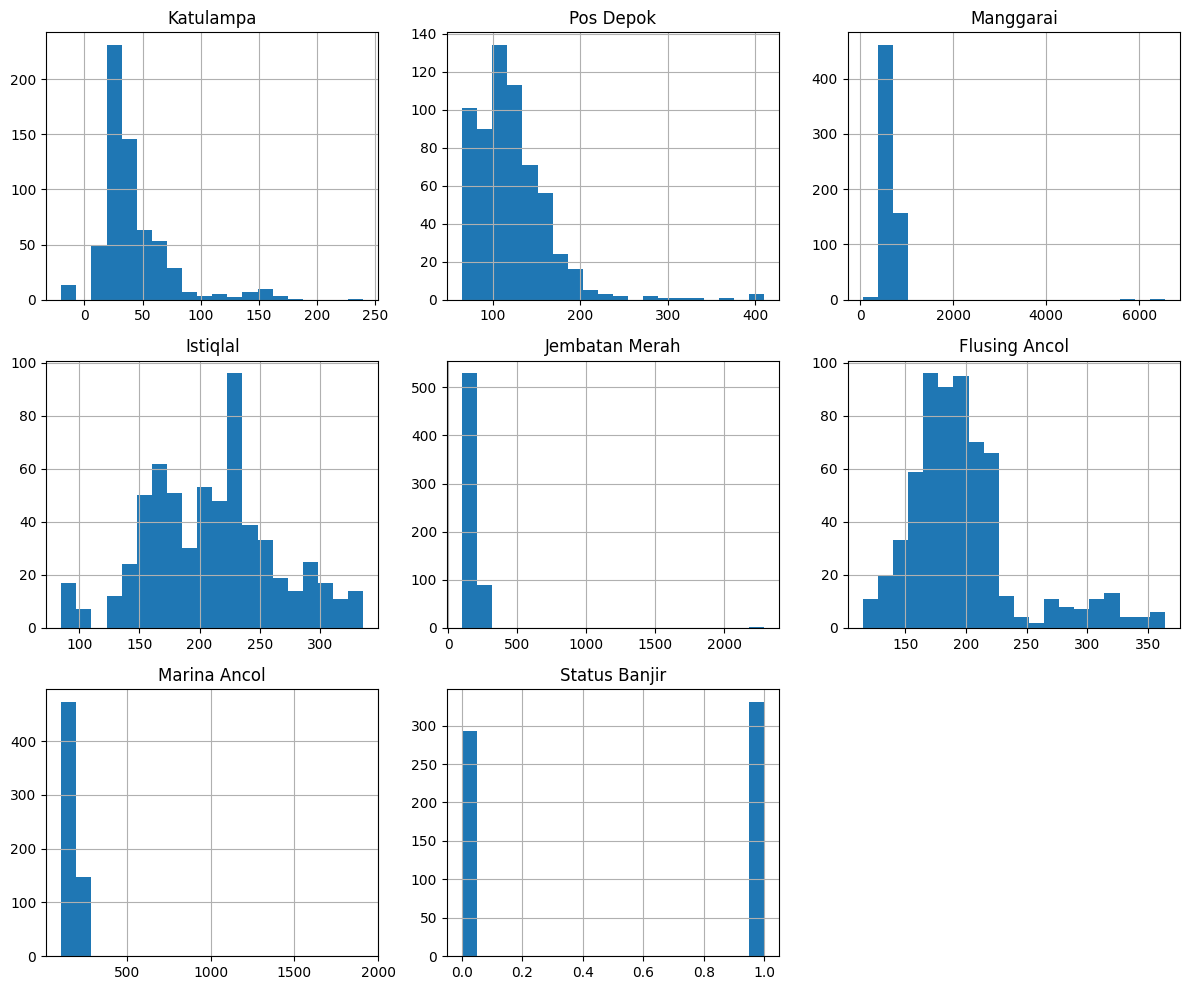

In [ ]:
if df is not None:
    try:
        print("\nMembuat histogram untuk fitur numerik...")
        ax = df.hist(figsize=(12, 10), bins=20)  # bins disesuaikan
        plt.tight_layout()
        plt.savefig("histogram.png")  # Simpan ke file
        plt.show()
    except Exception as e:
        print(f"Gagal membuat histogram: {e}")
else:
    print("Dataset belum dimuat.")



Membuat countplot untuk fitur kategorikal...


<ipython-input-6-c0762e6aa9a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,


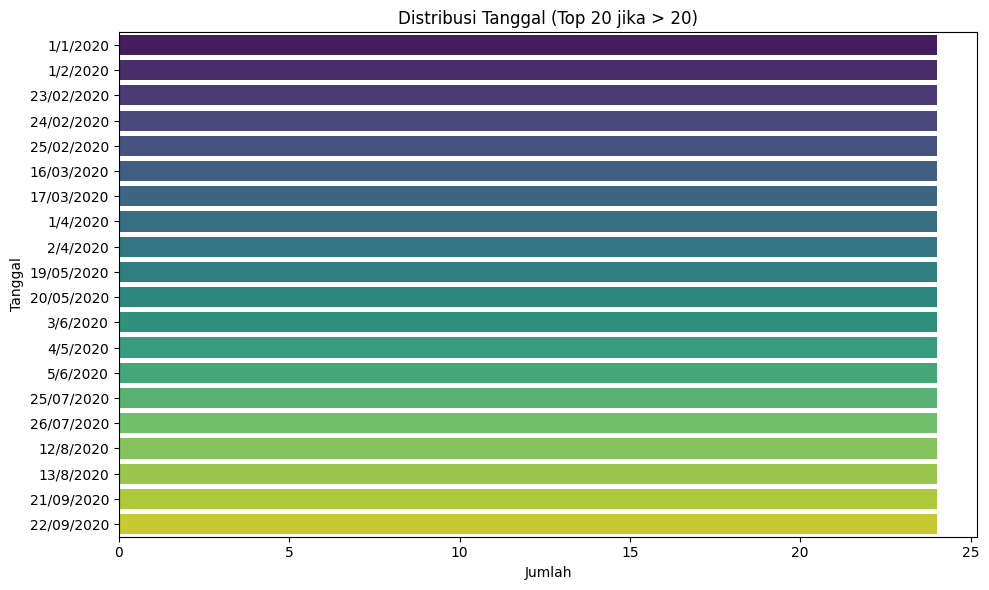

<ipython-input-6-c0762e6aa9a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,


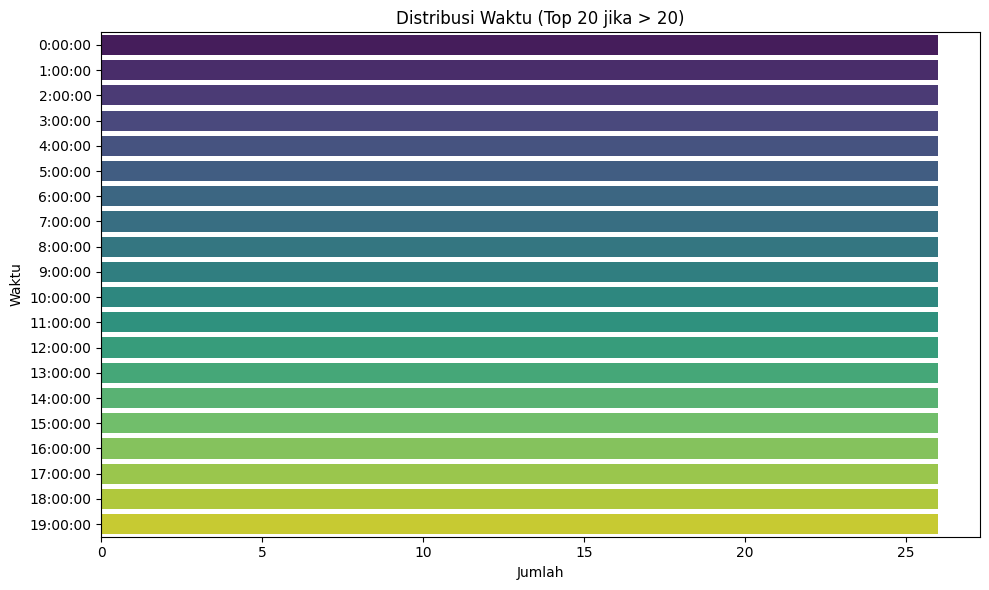

<ipython-input-6-c0762e6aa9a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,


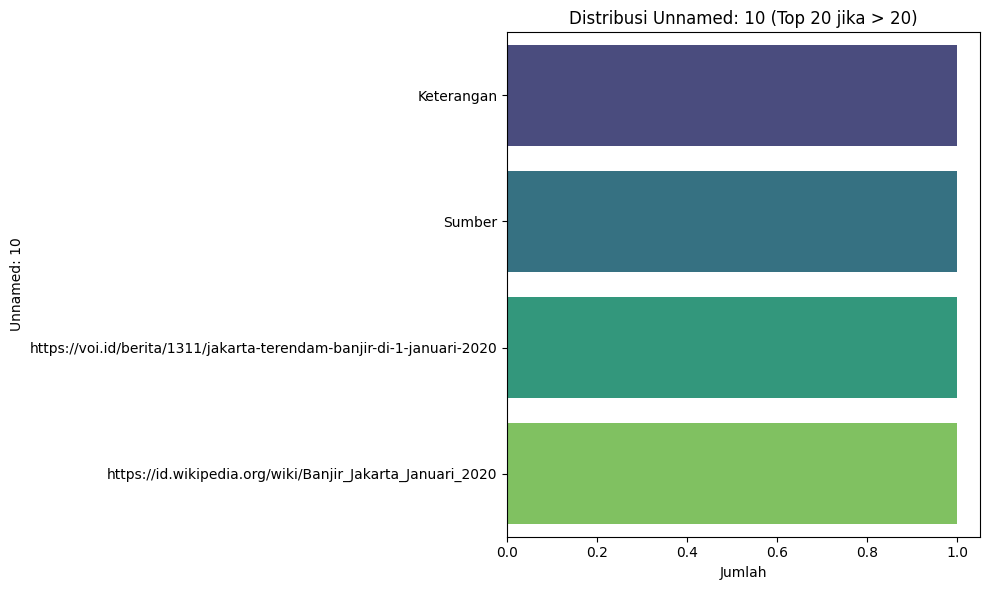

<ipython-input-6-c0762e6aa9a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,


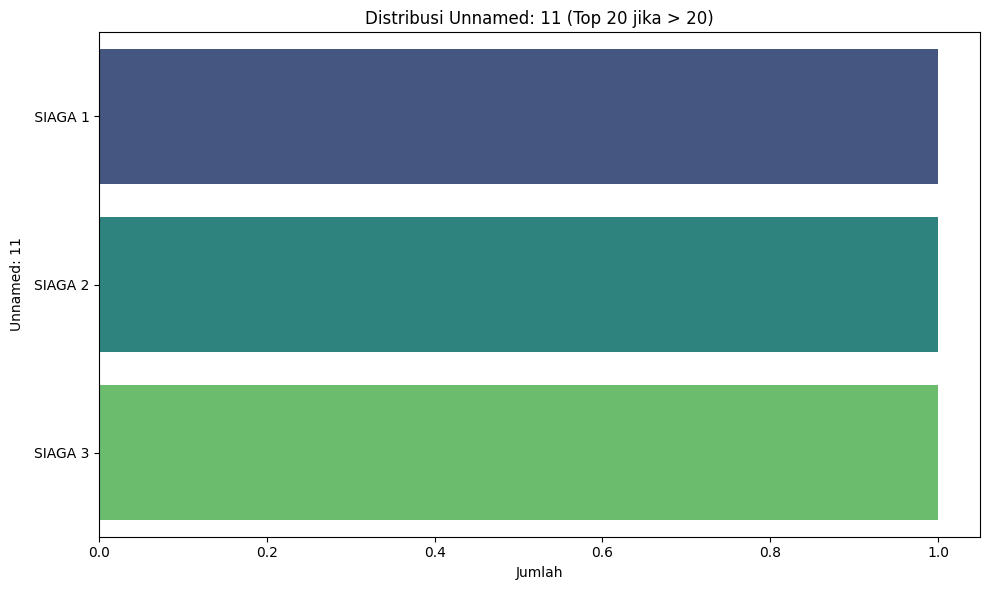

In [ ]:
if df is not None:
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nMembuat countplot untuk fitur kategorikal...")
    for column in categorical_cols:
        try:
            plt.figure(figsize=(10, 6))  # Sesuaikan ukuran jika perlu
            # Mengambil 20 kategori teratas jika > 20 agar plot tidak terlalu ramai
            top_categories = df[column].value_counts().nlargest(20).index
            sns.countplot(data=df[df[column].isin(top_categories)], y=column,
                          order=top_categories, palette='viridis')
            plt.title(f'Distribusi {column} (Top 20 jika > 20)')
            plt.xlabel('Jumlah')
            plt.ylabel(column)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Gagal membuat countplot untuk {column}: {e}")
else:
    print("Dataset belum dimuat.")



Membuat visualisasi hubungan dengan variabel target...


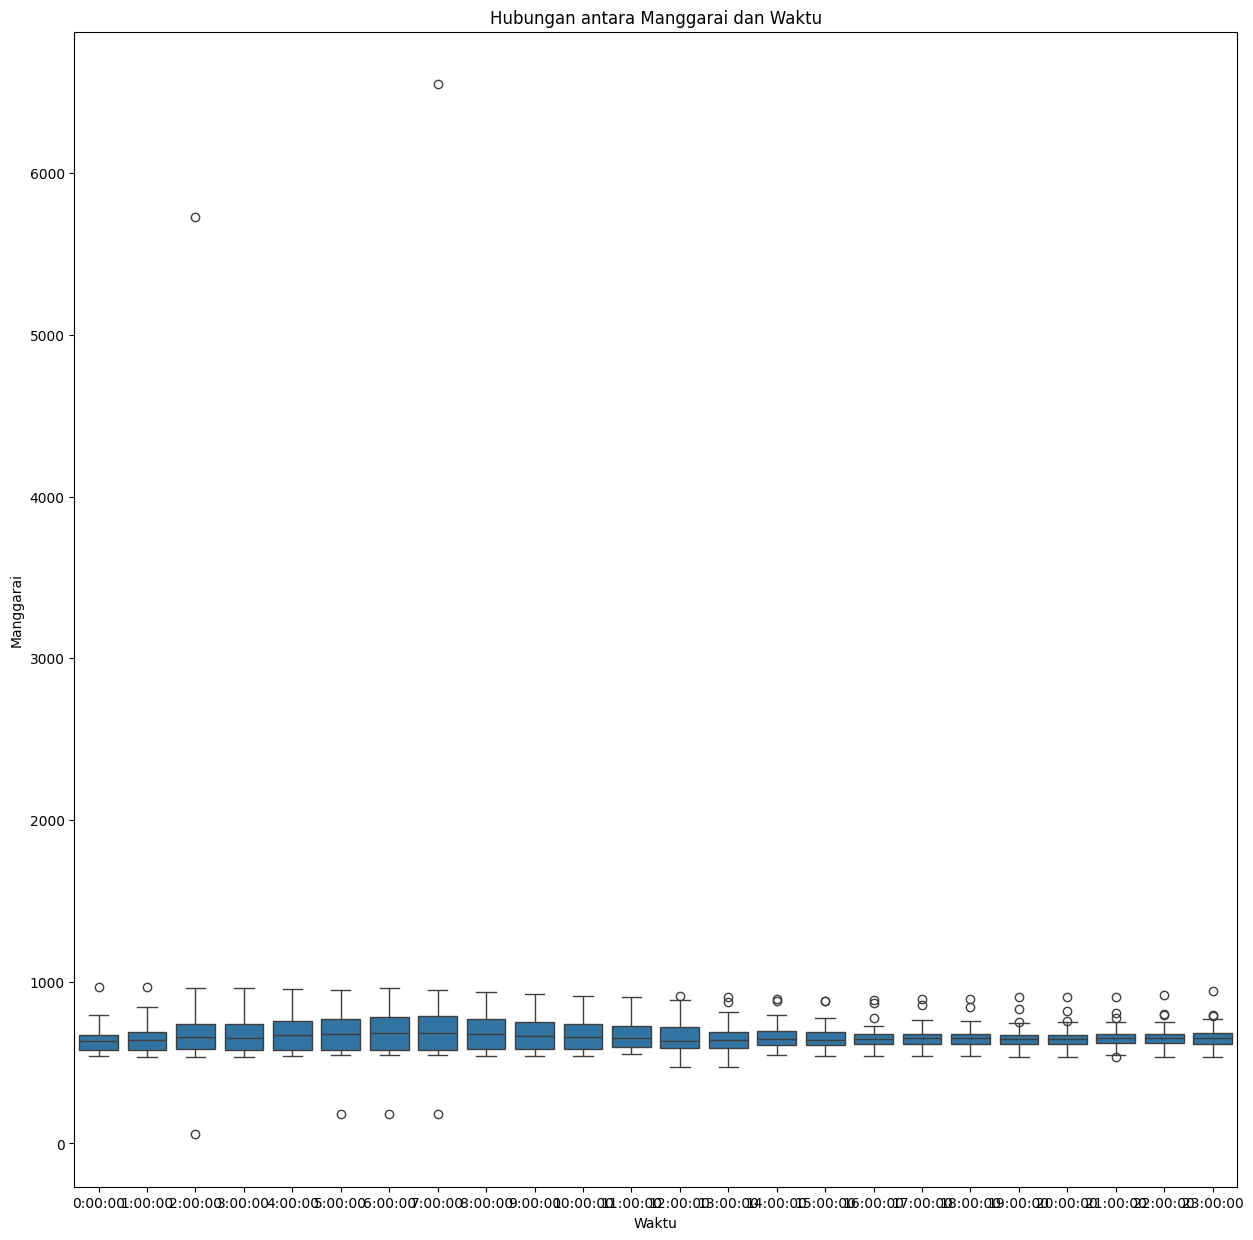

In [ ]:
# Misalnya target variabelnya 'Waktu'
if df is not None and 'Waktu' in df.columns:
    print("\nMembuat visualisasi hubungan dengan variabel target...")

    # Kolom numerik yang mau dicek hubungan dengan target
    numerical_to_plot = ['Manggarai']  # Ganti dengan kolom numerik yang sesuai
    for col in numerical_to_plot:
        if col in df.columns:
            plt.figure(figsize=(15, 15))
            sns.boxplot(data=df, x='Waktu', y=col)
            plt.title(f'Hubungan antara {col} dan Waktu')
            plt.show()


In [ ]:
if df is not None and 'Tanggal' in df.columns:
    # Cek nilai unik di kolom 'Tanggal'
    print("Nilai unik di 'Tanggal':", df['Tanggal'].unique())

    # Coba konversi ke numerik, paksa error menjadi NaN
    df['Tanggal'] = pd.to_numeric(df['Tanggal'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

    # Cek apakah ada NaN yang muncul setelah konversi (jika ada nilai non-numerik)
    if df['Tanggal'].isnull().sum() > 0:
        print("Peringatan: Ada nilai non-numerik di 'Tanggal', menghasilkan NaN.")

        # Handle NaN jika muncul (misal: imputasi median)
        median_fs = df['Tanggal'].median()

        # Cek apakah median_fs adalah NaN
        if pd.isna(median_fs):
            print("Tidak ada nilai yang valid untuk menghitung median.")
        else:
            df['Tanggal'] = df['Tanggal'].fillna(median_fs)
            print(f"NaN di 'Tanggal' diimputasi dengan median: {median_fs}")
    else:
        print("Kolom 'Tanggal' berhasil dikonversi ke numerik.")

    # Verifikasi tipe data baru`
    print(f"Tipe data baru 'Tanggal': {df['Tanggal'].dtype}")
else:
    print("Dataset atau kolom 'Tanggal' tidak ditemukan.")


Nilai unik di 'Tanggal': [ 1 23 24 25 16 17  2 19 20  3  4  5 26 12 13 21 22  8  9  6  7]
Kolom 'Tanggal' berhasil dikonversi ke numerik.
Tipe data baru 'Tanggal': int64


In [ ]:
if df is not None:
    print("\\n--- Memulai Encoding Variabel Kategorikal ---")
    # Identifikasi kolom kategorikal (tipe 'object' setelah Financial Stress dikonversi)
    categorical_cols_to_encode = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Hapus kolom yang tidak relevan jika ada (misal: id jika tidak dihapus sebelumnya)
    if 'Status Banjir' in categorical_cols_to_encode:
        categorical_cols_to_encode.remove('Status Banjir')  # Contoh jika 'Status Banjir' masih object

    if categorical_cols_to_encode:
        print(f"Kolom kategorikal yang akan di-encode: {categorical_cols_to_encode}")

        # Terapkan One-Hot Encoding
        df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

        # Hapus kolom 'Status Banjir' asli jika masih ada dan tidak diperlukan
        if 'Status Banjir' in df_encoded.columns:
            df_encoded = df_encoded.drop(['Status Banjir'], axis=1)
            print("Kolom 'Status Banjir' telah dihapus.")

        print(f"Dimensi dataset setelah One-Hot Encoding: {df_encoded.shape}")
        print("Contoh beberapa nama kolom baru:")
        print(df_encoded.columns[:5].tolist(), "...")
    else:
        print("Tidak ada kolom kategorikal yang perlu di-encode.")
        df_encoded = df.copy()
        if 'Status Banjir' in df_encoded.columns:  # Hapus Status Banjir jika tidak ada encoding
            df_encoded = df_encoded.drop(['Status Banjir'], axis=1)
            print("Kolom 'Status Banjir' telah dihapus.")
else:
    print("Dataframe 'df' tidak tersedia.")
    df_encoded = None


\n--- Memulai Encoding Variabel Kategorikal ---
Kolom kategorikal yang akan di-encode: ['Waktu', 'Unnamed: 10', 'Unnamed: 11']
Kolom 'Status Banjir' telah dihapus.
Dimensi dataset setelah One-Hot Encoding: (624, 36)
Contoh beberapa nama kolom baru:
['Tanggal', 'Katulampa', 'Pos Depok', 'Manggarai', 'Istiqlal'] ...


In [ ]:
from sklearn.preprocessing import MinMaxScaler

if 'df_encoded' in locals() and df_encoded is not None:
    print("\\n--- Memulai Scaling Fitur Numerik ---")
    # Identifikasi fitur numerik ASLI (sebelum OHE) untuk di-scale
    original_numerical_cols = ['Tanggal','Katulampa','Pos Depok','Manggarai','Istiqlal','Jembatan Merah','Flusing Ancol','Marina Ancol']
    if 'Waktu' in original_numerical_cols:
        original_numerical_cols.remove('Waktu')
    numerical_features_to_scale = [col for col in original_numerical_cols if col in df_encoded.columns]

    if numerical_features_to_scale:
        print(f"Fitur numerik yang akan di-scale: {numerical_features_to_scale}")

        scaler = MinMaxScaler()
        df_scaled = df_encoded.copy()
        # Terapkan scaler (idealnya fit_transform di train, transform di test)
        df_scaled[numerical_features_to_scale] = scaler.fit_transform(df_scaled[numerical_features_to_scale])

        print("\\nContoh data setelah normalisasi (fitur numerik yang di-scale):")
        print(df_scaled[numerical_features_to_scale].head())
        print("\\nStatistik deskriptif setelah scaling (cek min/max):")
        print(df_scaled[numerical_features_to_scale].describe().T)
    else:
        print("Tidak ada fitur numerik asli yang perlu di-scale.")
        df_scaled = df_encoded.copy()
else:
    print("Dataframe df_encoded tidak tersedia.")
    df_scaled = None


\n--- Memulai Scaling Fitur Numerik ---
Fitur numerik yang akan di-scale: ['Tanggal', 'Katulampa', 'Pos Depok', 'Manggarai', 'Istiqlal', 'Jembatan Merah', 'Flusing Ancol', 'Marina Ancol']
\nContoh data setelah normalisasi (fitur numerik yang di-scale):
   Tanggal  Katulampa  Pos Depok  Manggarai  Istiqlal  Jembatan Merah  \
0      0.0   0.257692   0.295652   0.089635  0.482072        0.029224   
1      0.0   0.246154   0.028986   0.095949  0.517928        0.034247   
2      0.0   0.238462   0.272464   0.104420  0.406375        0.042009   
3      0.0   0.234615   0.278261   0.121361  0.609562        0.056164   
4      0.0   0.230769   0.257971   0.128138  0.776892        0.073973   

   Flusing Ancol  Marina Ancol  
0       0.261044      0.027222  
1       0.265060      0.002222  
2       0.329317      0.032778  
3       0.353414      0.037778  
4       0.433735      0.045000  
\nStatistik deskriptif setelah scaling (cek min/max):
                count      mean       std  min       25%

In [ ]:
from sklearn.model_selection import train_test_split

if 'df_scaled' in locals() and df_scaled is not None and 'Tanggal' in df_scaled.columns:
    print('\n---- Manual Pembagian Dataset (Train-Test Split) ----')
    target_column = 'Tanggal'
    X = df_scaled.drop(target_column, axis=1)
    y = df_scaled[target_column]

    print(f"Ukuran Fitur (X) sebelum split: {X.shape}")
    print(f"Ukuran Target (y) sebelum split: {y.shape}")

    try:
        # Cek jumlah kelas unik dan distribusinya
        value_counts = y.value_counts()

        if value_counts.min() < 2 or y.nunique() > 20:
            print("Terdapat kelas dengan jumlah sangat sedikit atau terlalu banyak kelas unik. Menggunakan binning...")

            # Melakukan binning ke dalam 5 kategori berdasarkan quantiles
            y_binned = pd.qcut(y, q=5, labels=False, duplicates='drop')  # duplicates='drop' menghindari error jika batas bin sama

            # Split data dengan stratifikasi berdasarkan bin
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=0.2,
                random_state=42,
                stratify=y_binned
            )
        else:
            # Lanjutkan split dengan stratifikasi biasa
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=0.2,
                random_state=42,
                stratify=y
            )

        print("\nUkuran dataset setelah dibagi:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")

        print(f"\nProps target (y_train):\n{y_train.value_counts(normalize=True).map('{:.2%}'.format)}")
        print(f"\nProps target (y_test):\n{y_test.value_counts(normalize=True).map('{:.2%}'.format)}")

    except Exception as e:
        print(f"Error saat membagi dataset: {e}")

else:
    print("Dataframe 'df_scaled' atau kolom target 'Waktu' tidak tersedia.")


---- Manual Pembagian Dataset (Train-Test Split) ----
Ukuran Fitur (X) sebelum split: (624, 35)
Ukuran Target (y) sebelum split: (624,)
Terdapat kelas dengan jumlah sangat sedikit atau terlalu banyak kelas unik. Menggunakan binning...

Ukuran dataset setelah dibagi:
X_train shape: (499, 35)
X_test shape: (125, 35)
y_train shape: (499,)
y_test shape: (125,)

Props target (y_train):
Tanggal
0.00    12.02%
0.96    11.82%
1.00     7.41%
0.44     4.41%
0.72     4.21%
0.84     4.21%
0.80     4.01%
0.92     4.01%
0.20     4.01%
0.16     4.01%
0.12     4.01%
0.64     4.01%
0.24     3.81%
0.32     3.81%
0.08     3.61%
0.28     3.61%
0.48     3.61%
0.76     3.61%
0.88     3.41%
0.04     3.41%
0.60     3.01%
Name: proportion, dtype: object

Props target (y_test):
Tanggal
0.96    10.40%
0.00     9.60%
1.00     8.80%
0.60     7.20%
0.88     5.60%
0.04     5.60%
0.08     4.80%
0.76     4.80%
0.28     4.80%
0.48     4.80%
0.32     4.00%
0.24     4.00%
0.64     3.20%
0.80     3.20%
0.92     3.20%
0.1